In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [3]:
df = pd.read_csv('../data/historical/Batting.csv')
games = pd.read_csv('../data/historical/Teams.csv')

In [4]:
games = games[['yearID', 'teamID', 'G']]

In [5]:
game_gr = games.groupby('yearID').sum().reset_index()
gr = df.groupby('yearID').sum().reset_index().drop('G', axis = 1)
join = pd.merge(gr, game_gr, on = 'yearID', how = 'left')

In [6]:
join['r_G'] = join.R / join.G
join['hr_G'] = join.HR / join.G

In [7]:
pre = join.loc[join.yearID < 1961]
post = join.loc[join.yearID >= 1961]

In [8]:
post.head()

,yearID,stint,AB,R,H,2B,3B,HR,RBI,SB,...,BB,SO,IBB,HBP,SH,SF,GIDP,G,r_G,hr_G
90,1961,782,97032,12942,25066,3975,754,2730,12062.0,1046.0,...,9897,14947.0,732.0,573.0,1305.0,761.0,2232.0,2860,4.525175,0.954545
91,1962,821,110688,14461,28521,4313,853,3001,13546.0,1348.0,...,10936,17567.0,818.0,709.0,1361.0,846.0,2487.0,3242,4.460518,0.925663
92,1963,813,109814,12780,27043,4098,791,2704,11904.0,1236.0,...,9591,18773.0,933.0,714.0,1448.0,769.0,2256.0,3238,3.946881,0.835083
93,1964,814,110464,13124,27669,4270,760,2762,12233.0,1176.0,...,9621,19212.0,1015.0,694.0,1462.0,739.0,2394.0,3252,4.035670,0.849323
94,1965,804,109739,12946,26952,4199,787,2688,12012.0,1449.0,...,10036,19283.0,1130.0,720.0,1488.0,766.0,2363.0,3246,3.988293,0.828096


In [9]:
%R -i pre -i post

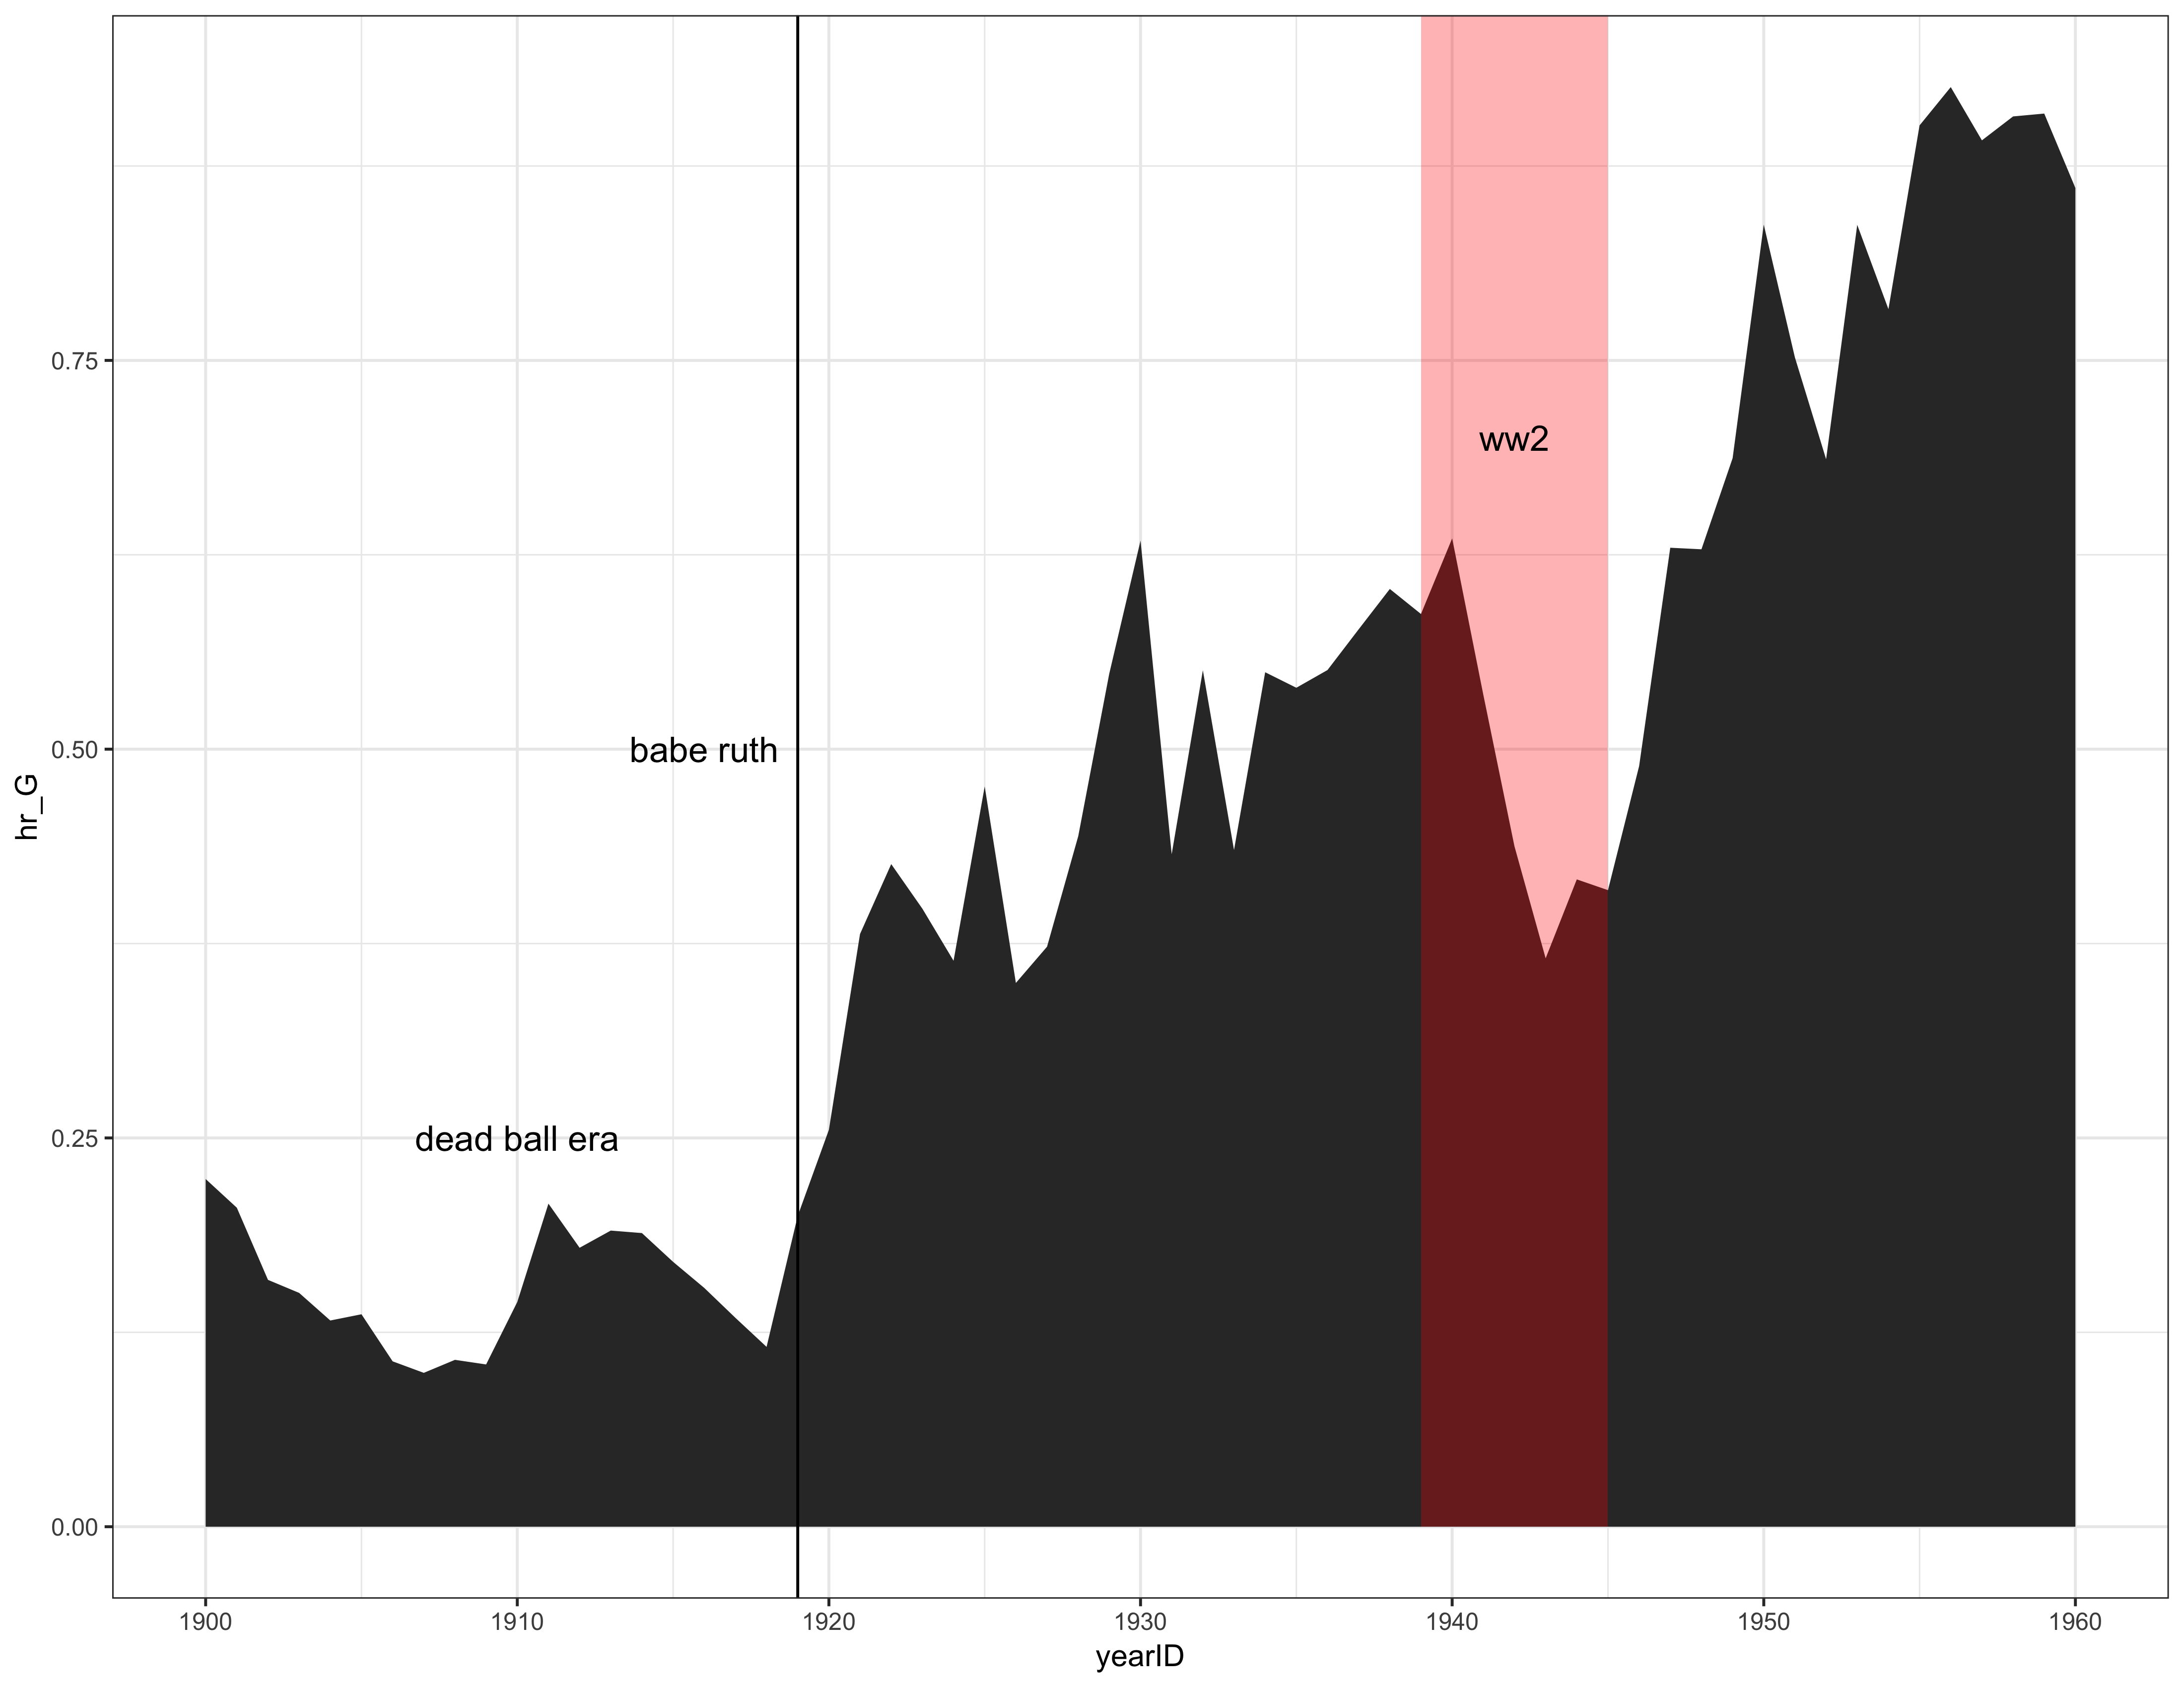

In [10]:
%%R -w 11 -h 8.5 --units in -r 400

ggplot() +
    geom_area(aes(x = yearID, y = hr_G), data = pre) +
    geom_vline(xintercept = 1919) +
    geom_rect(aes(xmin = 1939, xmax = 1945, ymin = 0, ymax = Inf), alpha = 0.3, fill = 'red') +
    annotate("text", x = 1910, y = 0.25, size = 4.5, color = 'black',
                label = "dead ball era") +
    annotate("text", x = 1916, y = 0.5, size = 4.5, color = 'black',
                label = "babe ruth") +
    annotate("text", x = 1942, y = 0.7, size = 4.5, color = 'black',
                label = "ww2") +
    scale_x_continuous(limits = c(1900, 1960), breaks = seq(1900, 1960, by = 10)) +
    theme_bw()

In [11]:
post.tail()

,yearID,stint,AB,R,H,2B,3B,HR,RBI,SB,...,BB,SO,IBB,HBP,SH,SF,GIDP,G,r_G,hr_G
143,2014,1558,165614,19761,41595,8137,849,4186,18745.0,2764.0,...,14020,37441.0,985.0,1652.0,1343.0,1277.0,3609.0,4860,4.066049,0.861317
144,2015,1630,165488,20647,42106,8242,939,4909,19650.0,2505.0,...,14073,37446.0,951.0,1602.0,1200.0,1232.0,3739.0,4858,4.250103,1.010498
145,2016,1620,165561,21744,42276,8254,873,5610,20745.0,2537.0,...,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0,4856,4.477759,1.155272
146,2017,1638,165567,22582,42215,8397,795,6105,21558.0,2527.0,...,15829,40104.0,970.0,1763.0,925.0,1168.0,3804.0,4860,4.646502,1.256173
147,2018,1705,165432,21630,41020,8265,847,5585,20606.0,2474.0,...,15686,41207.0,929.0,1922.0,823.0,1235.0,3457.0,4862,4.448787,1.148704


In [12]:
era = post.loc[(post.yearID > 1987) ]
era['steroidFlag'] = np.where(era.yearID < 1993, 'no', 'yes')

In [13]:
era.head(2)

,yearID,stint,AB,R,H,2B,3B,HR,RBI,SB,...,SO,IBB,HBP,SH,SF,GIDP,G,r_G,hr_G,steroidFlag
117,1988,1097,142568,17380,36244,6386,840,3180,16219.0,3301.0,...,23355.0,1367.0,918.0,1630.0,1265.0,3087.0,4200,4.138095,0.757143,no
118,1989,1160,142821,17405,36293,6307,868,3083,16229.0,3116.0,...,23650.0,1446.0,801.0,1626.0,1240.0,3064.0,4212,4.132241,0.731956,no


In [14]:
%R -i era

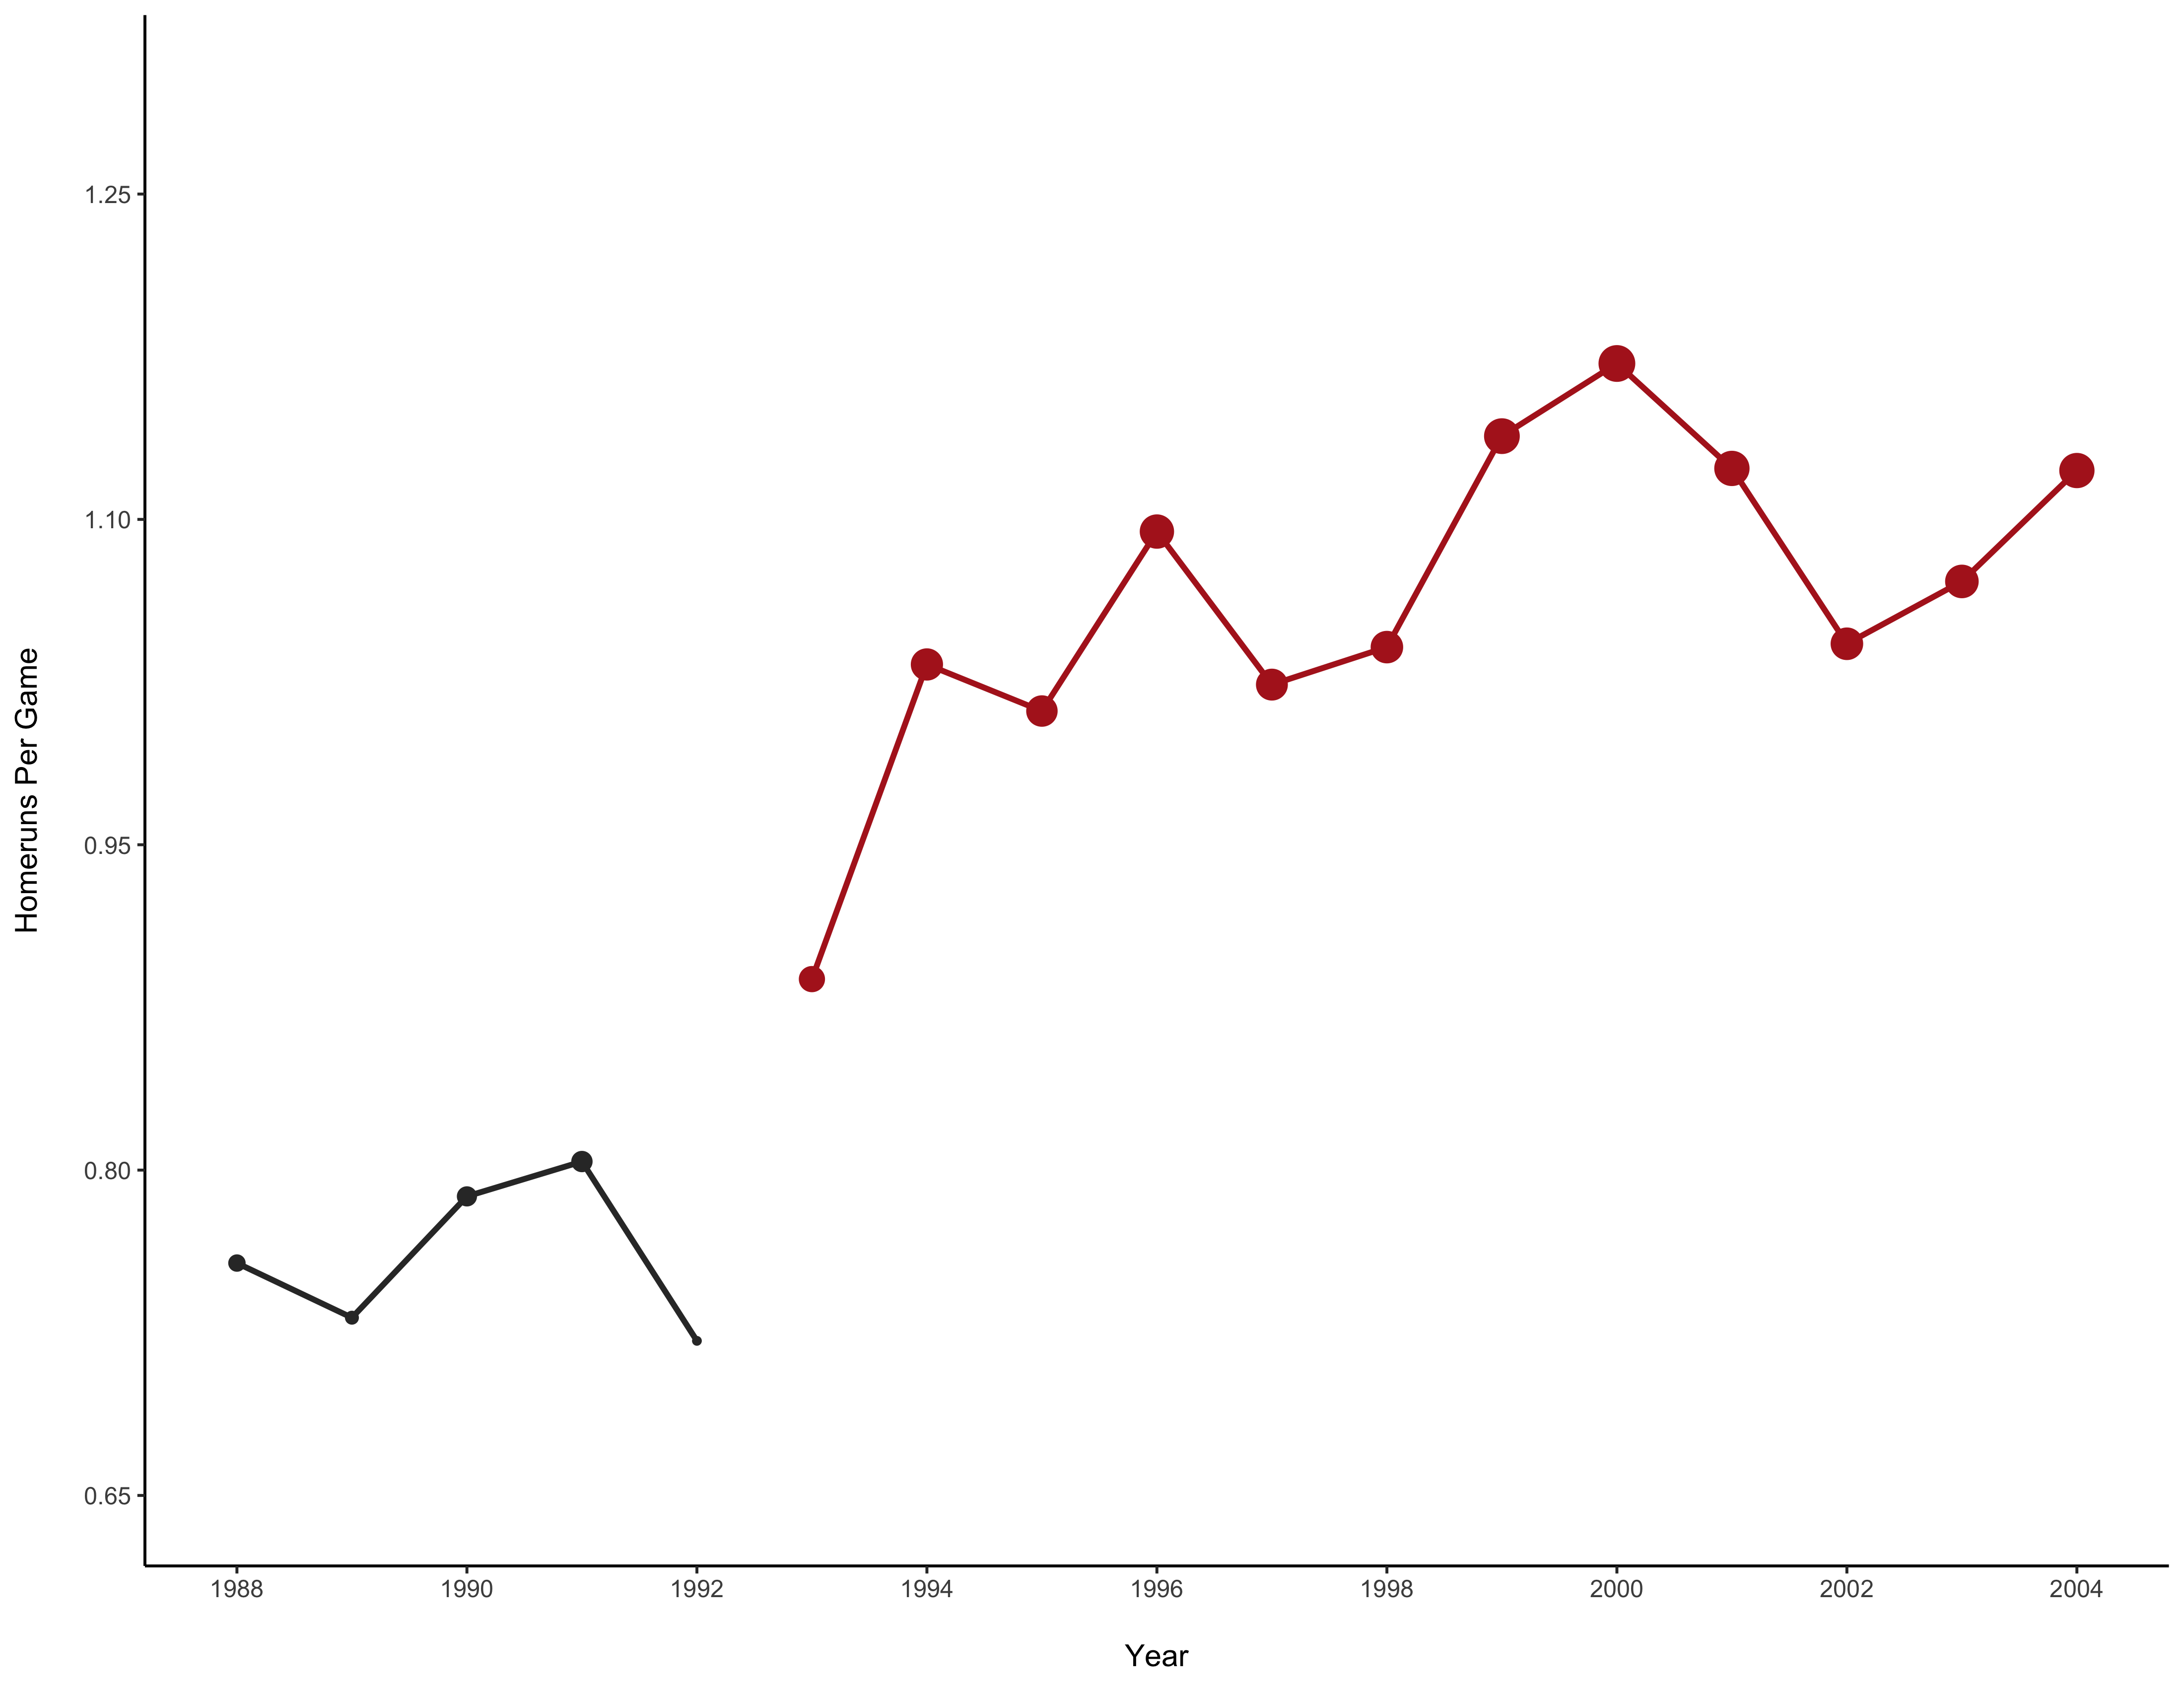

In [26]:
%%R -w 11 -h 8.5 --units in -r 400

ggplot() +
    geom_point(aes(x = yearID, y = hr_G, color = steroidFlag, size = hr_G), data = era) +
    geom_line(aes(x = yearID, y = hr_G, color = steroidFlag), size = 1, data = era) +
    scale_color_manual(values = c('gray20', 'firebrick')) +
    scale_x_continuous(limits = c(1988, 2004), breaks = seq(1988, 2004, by = 2)) +
    scale_y_continuous(limit = c(0.65, 1.3), breaks = seq(0.65, 1.3, by = 0.15)) +
    xlab('\nYear') +
    ylab('Homeruns Per Game\n') +
    theme_classic() +
    guides(color = F, size = F)

In [27]:
%R ggsave('../images/era.pdf', units = 'in', width = 11, height = 8.5, dpi = 400)